# Proyek Analisis Data: Bike Sharing


*   Nama: Syifa Fauziyah
*   Email: syifauziyah4@gmail.com
*   ID Dicoding: syifauziyaahhh





# Menentukan Pertanyaan Bisnis

* Bagaimana pola penyewaan sepeda per jam dan per hari?
* Bagaimana jenis hari (libur/kerja) mempengaruhi perilaku penyewaan sepeda?
* Berapa jumlah penyewaan sepeda pada setiap season di setiap tahunnya?
* Berapa total penyewa pengguna terdaftar dan kasual?
* Bagaimana pengaruh kondisi cuaca (seperti suhu, kelembapan, dan kecepatan angin) terhadap permintaan penyewaan sepeda?

# Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

# **Gathering Data**

Sumber Data: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# **Assessing Data**

In [9]:
#Mengecek duplikasi data dan melihat info tabel day_df
print('Jumlah duplikasi data: ', day_df.duplicated().sum())
day_df.info()

Jumlah duplikasi data:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtype

In [10]:
#Mengecek duplikasi data dan melihat info tabel hour_df
print('Jumlah duplikasi data: ', hour_df.duplicated().sum())
hour_df.info()

Jumlah duplikasi data:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 

In [11]:
#Mengecek jumlah missing value pada tabel day_df
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [12]:
#Mengecek jumlah missing value pada tabel hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0




> kedua dataset tidak terdapat duplikasi data dan missing value, namun terdapat kesalahan tipe data pada dteday yang seharusnya datetime bukan object.



# Cleaning Data

In [6]:
#Merubah tipe data dteday pada kedua dataset
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [7]:
#cek tipe data yang telah diubah
print(day_df['dteday'].dtype)
print(hour_df['dteday'].dtype)

datetime64[ns]
datetime64[ns]


# Exploratory Data Analysis (EDA)

# Explore Data Day

In [8]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**dapat diketahui:**

* data berawal dari 01-01-2011 dan berakhir 31-12-2012
* temperatur tertinggi adalah 0.86 dan terendah 0.059
* atemp terbesar 0.84 dan terendah 0.079
* hum terbesar 0.97 dan terendah 0.0
* windspeed tertinggi 0.50 dan terendah 0.02

In [13]:
# Hitung total penyewaan berdasarkan hari dalam seminggu
daily_rentals = day_df.groupby('weekday')['cnt'].sum()
daily_rentals

,cnt
weekday,
0,444027
1,455503
2,469109
3,473048
4,485395
5,487790
6,477807


> dapat diketahui bahwa penyewaan terbanyak adalah pada hari Jumat



In [14]:
# Menggunakan 'day_df' untuk analisis berbasis harian
pivot_table_season = day_df.pivot_table(values='cnt', index='yr', columns='season', aggfunc='sum')

# Mengganti indeks dan kolom untuk membuatnya lebih mudah dibaca
pivot_table_season.index = ['2011', '2012']
pivot_table_season.columns = ['Spring', 'Summer', 'Fall', 'Winter']

# Menampilkan pivot table
print(pivot_table_season)

      Spring  Summer    Fall  Winter
2011  150000  347316  419650  326137
2012  321348  571273  641479  515476




> dapat diketahui penyewaan terbanyak terjadi saat season Fall dan terendah saat season Spring baik pada tahun 2011 maupun 2012



In [15]:
# Menggunakan 'day_df' untuk analisis berbasis harian
pivot_table_workingday = day_df.pivot_table(values='cnt', index='yr', columns='workingday', aggfunc='sum')

# Mengganti indeks dan kolom untuk membuatnya lebih mudah dibaca
pivot_table_workingday.index = ['2011', '2012']
pivot_table_workingday.columns = ['Holiday/Weekend', 'Working Day']

# Menampilkan pivot table
print(pivot_table_workingday)

      Holiday/Weekend  Working Day
2011           386839       856264
2012           613430      1436146


> penyewaan sepeda pada hari kerja lebih banyak daripada holiday/weekend

In [16]:
#Menghitung jumlah pengguna terdaftar dan kasual
total_registered = day_df['registered'].sum()
total_casual = day_df['casual'].sum()

print(f"Total pengguna terdaftar: {total_registered}")
print(f"Total pengguna kasual: {total_casual}")

Total pengguna terdaftar: 2672662
Total pengguna kasual: 620017


> pengguna terdaftar lebih banyak daripada pengguna kasual

# Explore Data Hour

In [17]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**dapat diketahui:**

* data berawal dari 01-01-2011 dan berakhir 31-12-2012
* temperatur tertinggi adalah 1.0 dan terendah 0.02
* atemp terbesar 1.0 dan terendah 0.0
* hum terbesar 1.0 dan terendah 0.0
* windspeed tertinggi 0.85 dan terendah 0.0

In [18]:
# Hitung total penyewaan berdasarkan jam dalam sehari
hourly_rentals = hour_df.groupby('hr')['cnt'].sum()
hourly_rentals

,cnt
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


> sepeda banyak yang disewa di jam 17 dan sedikit sekali disewa di jam 4 pagi

In [19]:
# Menghitung total penyewaan berdasarkan kondisi cuaca
pivot_table_weather = hour_df.pivot_table(values='cnt', index='weathersit', aggfunc='sum')

# Menambahkan label untuk kondisi cuaca
weather_conditions = {
    1: 'Clear, Few clouds, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog',
}
pivot_table_weather.index = pivot_table_weather.index.map(weather_conditions)

# Menampilkan pivot table
print(pivot_table_weather)

                                                        cnt
weathersit                                                 
Clear, Few clouds, Partly cloudy                    2338173
Mist + Cloudy, Mist + Broken clouds, Mist + Few...   795952
Light Snow, Light Rain + Thunderstorm + Scatter...   158331
Heavy Rain + Ice Pallets + Thunderstorm + Mist,...      223


> sepeda paling banyak disewa saat cuaca cerah atau berawan dan paling sedikit disewa disaat hujan/petir

# Visualization & Explanatory Analysis

**Pertanyaan 1: Bagaimana pola penyewaan sepeda per jam dan per hari?**

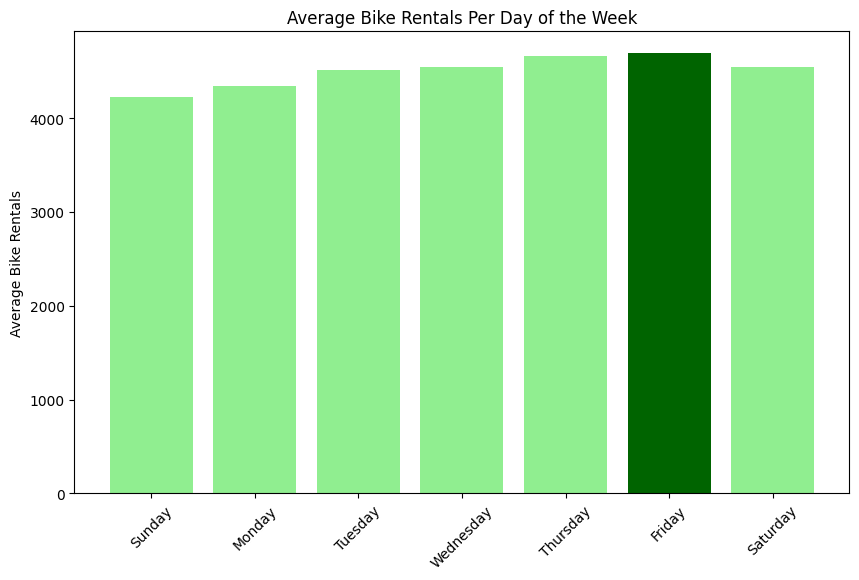

In [22]:
#sewa sepeda setiap harinya dalam seminggu
#mengelompokkan data berdasarkan 'weekday' dan menghitung rata-rata jumlah sewa per hari
avg_rentals = day_df.groupby('weekday')['cnt'].mean()
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

colors = ['lightgreen'] * 7
colors[np.argmax(avg_rentals.values)] = 'darkgreen'
plt.figure(figsize=(10,6))
bars = plt.bar(range(7), avg_rentals, color=colors)
plt.xticks(ticks=range(7), labels=days, rotation=45)
plt.ylabel("Average Bike Rentals")
plt.title("Average Bike Rentals Per Day of the Week")
plt.show()

> Hari Jumat adalah rata-rata penyewaan sepeda terbanyak

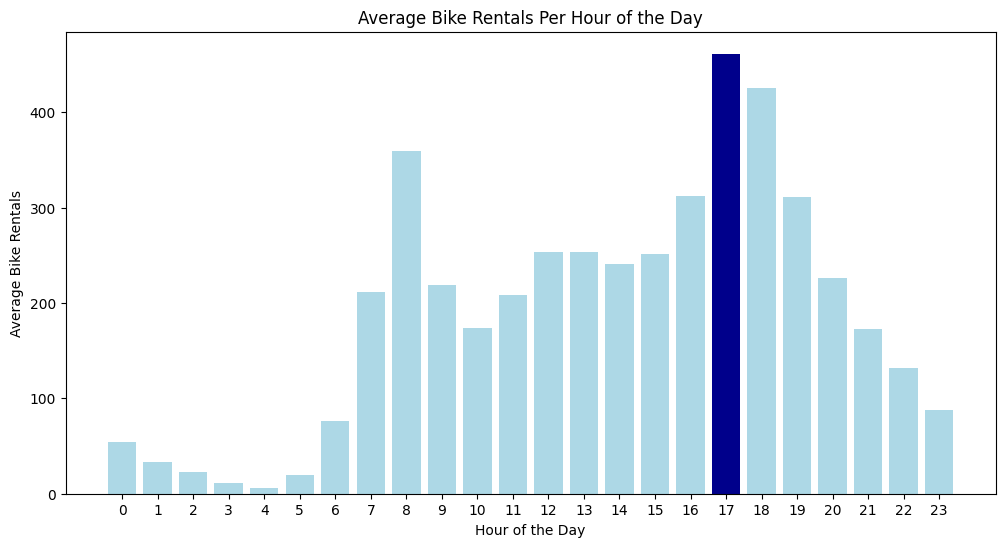

In [28]:
#sewa sepeda setiap jam nya dalam sehari
#mengelompokkan data berdasarkan 'hr' dan menghitung rata-rata jumlah sewa per jam
avg_rentals_hourly = hour_df.groupby('hr')['cnt'].mean()

colors_hourly = ['lightblue'] * 24
colors_hourly[np.argmax(avg_rentals_hourly.values)] = 'darkblue'
plt.figure(figsize=(12,6))
bars_hourly = plt.bar(range(24), avg_rentals_hourly, color=colors_hourly)
plt.xticks(ticks=range(24))
plt.xlabel("Hour of the Day")
plt.ylabel("Average Bike Rentals")
plt.title("Average Bike Rentals Per Hour of the Day")
plt.show()

> paling banyak sewa ada pada jam 17 atau jam 5 sore dan sedikit sekali disewa di jam 4 pagi

**Pertanyaan 2: Bagaimana jenis hari (libur/kerja) mempengaruhi perilaku penyewaan sepeda?**

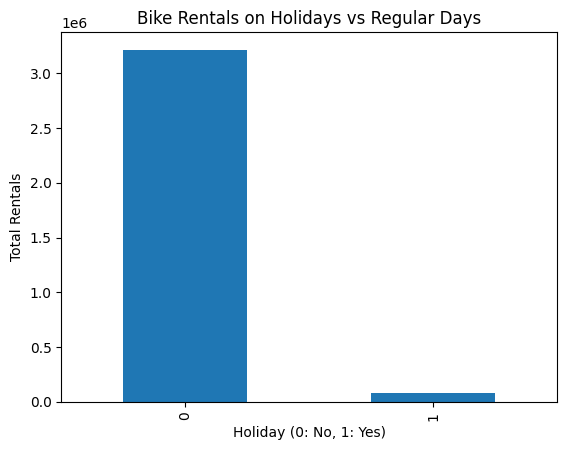

In [29]:
#penyewaan hari libur dan hari biasa
holiday_rentals = day_df.groupby('holiday')['cnt'].sum()
holiday_rentals.plot(kind='bar')
plt.xlabel('Holiday (0: No, 1: Yes)')
plt.ylabel('Total Rentals')
plt.title('Bike Rentals on Holidays vs Regular Days')
plt.show()

> penyewaan sepeda di hari kerja jauh lebih banyak dibandingkan saat weekend/holiday

Pertanyaan 3: Berapa jumlah penyewaan sepeda pada setiap season di setiap tahunnya?

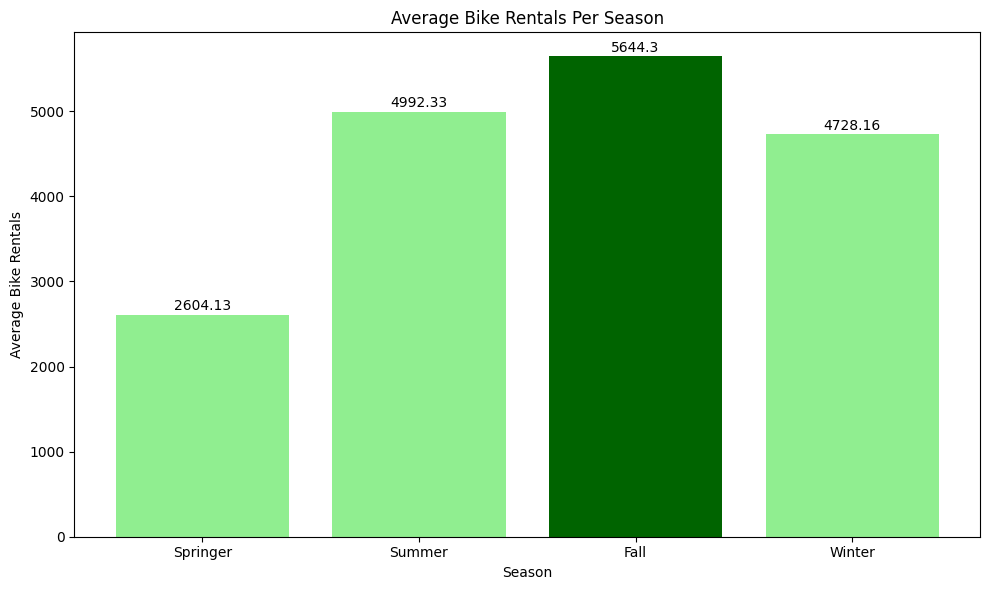

In [31]:
seasons_dict = {
    1: 'Springer',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

# Mengelompokkan data berdasarkan 'season' dan menghitung rata-rata jumlah sewa per musim
avg_rentals_season = day_df.groupby('season')['cnt'].mean()

colors_season = ['lightgreen'] * 4
colors_season[np.argmax(avg_rentals_season.values)] = 'darkgreen'
plt.figure(figsize=(10,6))
bars_season = plt.bar([seasons_dict[s] for s in avg_rentals_season.index], avg_rentals_season, color=colors_season)

for bar in bars_season:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, round(yval,2), ha='center', va='bottom')

plt.xlabel("Season")
plt.ylabel("Average Bike Rentals")
plt.title("Average Bike Rentals Per Season")
plt.tight_layout()
plt.show()

> Rata-rata jumlah sewa sepeda saat musim semi yaitu 2.604,13 sewa Saat musim panas rata-rata sebanyak 4.992,33 sewa Penyewa sepeda meningkat saat musim gugur yaitu rata-rata sebanyak 5.644,3 Terbanyak sewa ketiga ada di musim dingin yaitu rata-rata sebanyak 4.728,16

**Pertanyaan 4: Berapa total penyewa pengguna terdaftar dan kasual?**

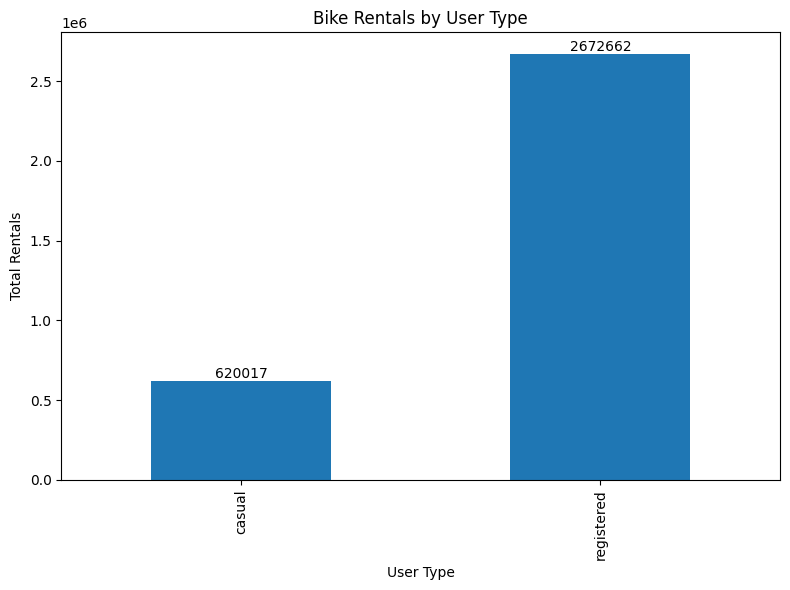

In [32]:
# Pola sewa antara pengguna terdaftar dan kasual
user_types = day_df[['casual', 'registered']].sum()
ax = user_types.plot(kind='bar', figsize=(8,6))

# Menambahkan angka di atas batang diagram
for i, v in enumerate(user_types.values):
    ax.text(i, v + 100, int(v), ha='center', va='bottom')

plt.xlabel('User Type')
plt.ylabel('Total Rentals')
plt.title('Bike Rentals by User Type')
plt.tight_layout()
plt.show()

> jumlah pendaftar registered jauh lebih banyak dibandingkan dengan casual. pengguna terdaftar ada sebanyak 2.672.662 pengguna sedangkan casual sejumlah 620.017 pengguna

**Pertanyaan 5: Bagaimana pengaruh kondisi cuaca (seperti suhu, kelembapan, dan kecepatan angin) terhadap permintaan penyewaan sepeda?**

In [38]:
def categorize_day(row):
    if row['temp'] < 0.25:
        temp_category = 'Dingin'
    elif row['temp'] < 0.5:
        temp_category = 'Sejuk'
    elif row['temp'] < 0.75:
        temp_category = 'Hangat'
    else:
        temp_category = 'Panas'

    if row['hum'] < 0.3:
        hum_category = 'Kering'
    elif row['hum'] < 0.7:
        hum_category = 'Normal'
    else:
        hum_category = 'Lembap'

    if row['windspeed'] < 0.3:
        wind_category = 'Tenang'
    elif row['windspeed'] < 0.6:
        wind_category = 'Sedang'
    else:
        wind_category = 'Kencang'

    weather_map = {
        1: 'Cerah',
        2: 'Berawan/Berkabut',
        3: 'Hujan Ringan/Salju',
        4: 'Hujan Lebat/Salju Besar'
    }
    weather_category = weather_map[row['weathersit']]

    return temp_category, hum_category, wind_category, weather_category

day_df['temp_category'], day_df['hum_category'], day_df['wind_category'], day_df['weather_category'] = zip(*day_df.apply(categorize_day, axis=1))


<ipython-input-43-5ef711ed0e15>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=day_df, x='temp_category', order=['Dingin', 'Sejuk', 'Hangat', 'Panas'], palette=['red', 'orange', 'green', 'blue'])
<ipython-input-43-5ef711ed0e15>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=day_df, x='hum_category', order=['Kering', 'Normal', 'Lembap'], palette=['red', 'orange', 'green', 'blue'])
<ipython-input-43-5ef711ed0e15>:12: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(data=day_df, x='hum_category', order=['Kering', 'Normal', 'Lembap'], palette=['red', 'orange', 'green', 'blue'])
<ipython-input-43-5ef711ed0e15>:19: F

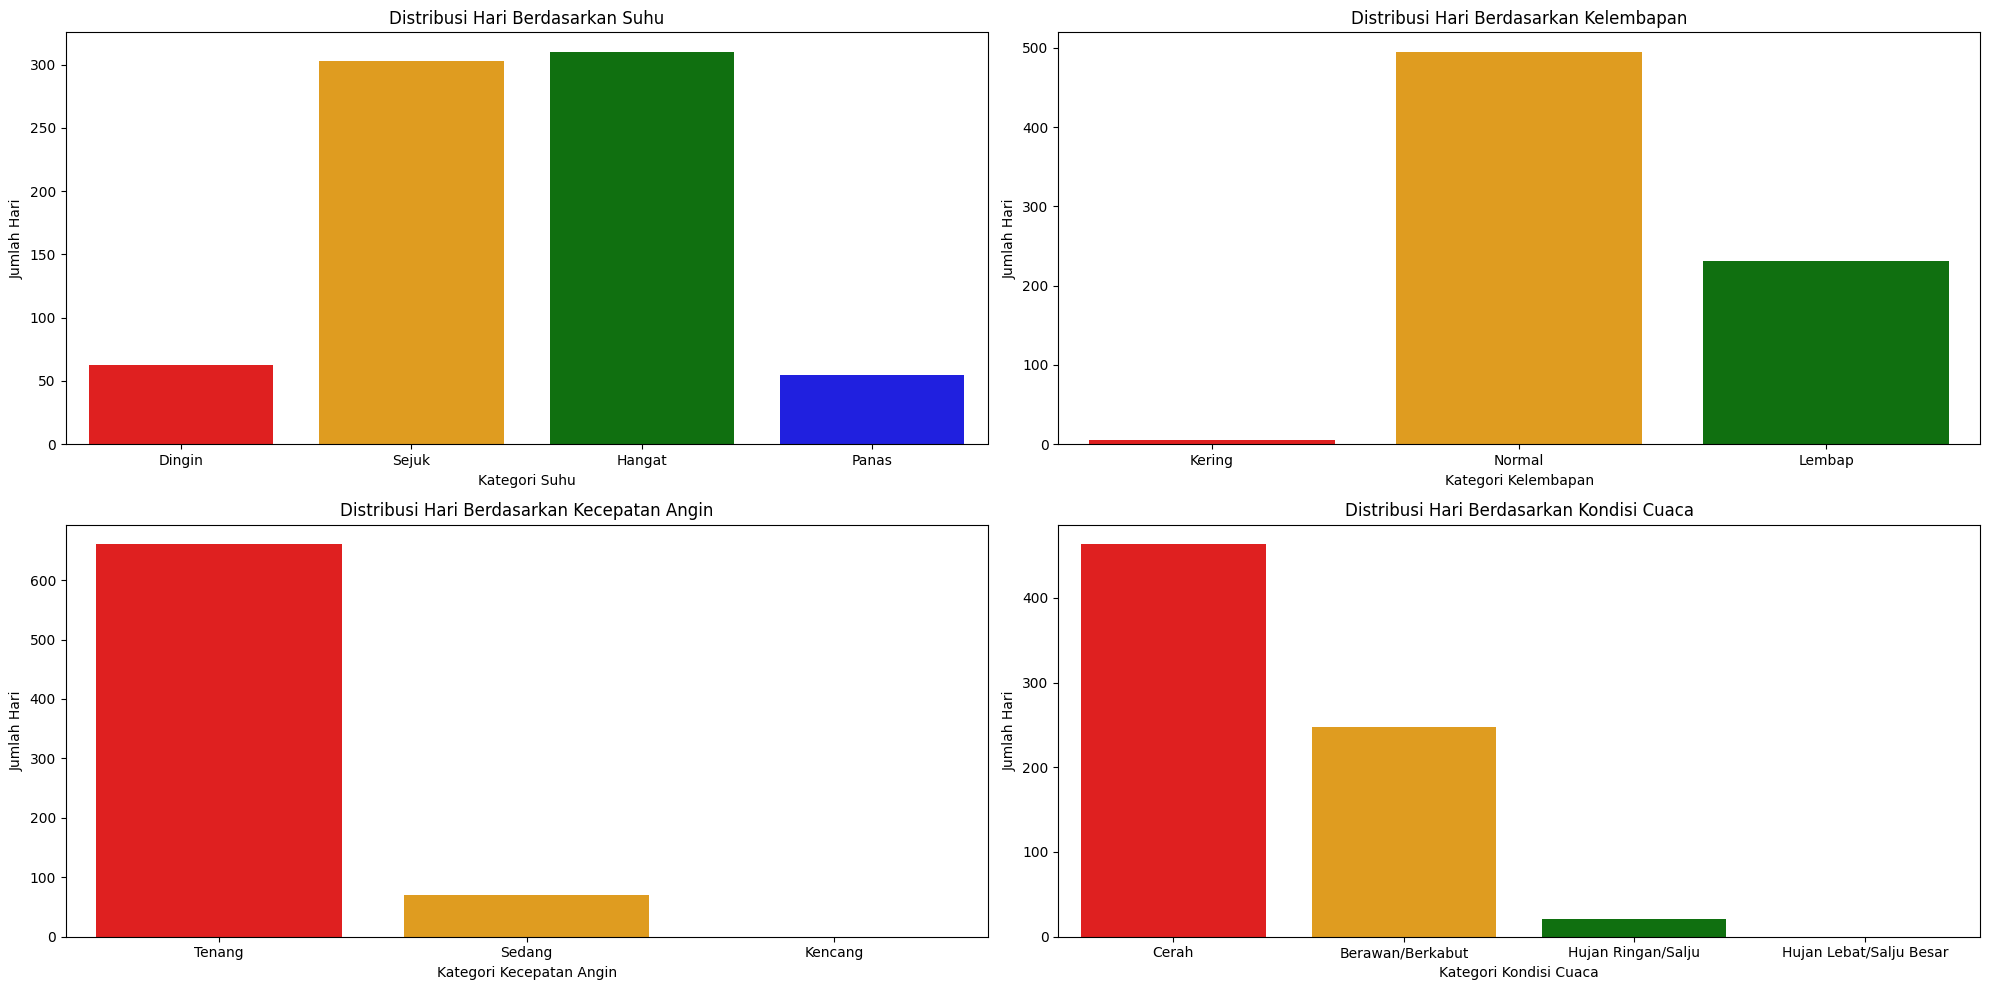

In [43]:
plt.figure(figsize=(20, 10))

# Visualisasi berdasarkan kategori suhu
plt.subplot(2, 2, 1)
sns.countplot(data=day_df, x='temp_category', order=['Dingin', 'Sejuk', 'Hangat', 'Panas'], palette=['red', 'orange', 'green', 'blue'])
plt.title('Distribusi Hari Berdasarkan Suhu')
plt.xlabel('Kategori Suhu')
plt.ylabel('Jumlah Hari')

# Visualisasi berdasarkan kategori kelembapan
plt.subplot(2, 2, 2)
sns.countplot(data=day_df, x='hum_category', order=['Kering', 'Normal', 'Lembap'], palette=['red', 'orange', 'green', 'blue'])
plt.title('Distribusi Hari Berdasarkan Kelembapan')
plt.xlabel('Kategori Kelembapan')
plt.ylabel('Jumlah Hari')

# Visualisasi berdasarkan kategori kecepatan angin
plt.subplot(2, 2, 3)
sns.countplot(data=day_df, x='wind_category', order=['Tenang', 'Sedang', 'Kencang'], palette=['red', 'orange', 'green', 'blue'])
plt.title('Distribusi Hari Berdasarkan Kecepatan Angin')
plt.xlabel('Kategori Kecepatan Angin')
plt.ylabel('Jumlah Hari')

# Visualisasi berdasarkan kategori kondisi cuaca
plt.subplot(2, 2, 4)
sns.countplot(data=day_df, x='weather_category', order=['Cerah', 'Berawan/Berkabut', 'Hujan Ringan/Salju', 'Hujan Lebat/Salju Besar'], palette=['red', 'orange', 'green', 'blue'])
plt.title('Distribusi Hari Berdasarkan Kondisi Cuaca')
plt.xlabel('Kategori Kondisi Cuaca')
plt.ylabel('Jumlah Hari')

plt.tight_layout()
plt.show()

> Sewa sepeda banyak saat udara sejuk dan hangat, kelembapan normal, angin tenang, dan cuaca yang cerah/berawan.

# Conclusion

1. Bagaimana pola penyewaan sepeda per jam dan per hari?
> Sewa sepeda terus naik dari hari Minggu hingga jumat kemudian menurun setelahnya dan berulang. Sewa sepeda terbanyak ada pada hari Jumat dan di jam 17 dan sewa sepeda paling sedikit adalah di hari Minggu dan di jam 3-4 pagi
2. Bagaimana jenis hari (libur/kerja) mempengaruhi perilaku penyewaan sepeda?
> Cuaca dan jenis hari mempengaruhi penyewaan sepeda. Sewa sepeda jauh lebih banyak disaat cuaca cerah/berawan dan saat working days.
3. Berapa jumlah penyewaan sepeda pada setiap season di setiap tahunnya?
> Rata-rata jumlah sewa sepeda saat musim semi yaitu 2.604,13 sewa. Saat musim panas rata-rata sebanyak 4.992,33 sewa. Penyewa sepeda meningkat saat musim gugur yaitu rata-rata sebanyak 5.644,3 sewa. Terbanyak sewa ketiga ada di musim dingin yaitu rata-rata sebanyak 4.728,16 sewa.
4. Berapa total penyewa pengguna terdaftar dan kasual?
> jumlah pendaftar registered jauh lebih banyak dibandingkan dengan casual. pengguna terdaftar ada sebanyak 2.672.662 pengguna sedangkan casual sejumlah 620.017 pengguna.
5. Bagaimana pengaruh kondisi cuaca (seperti suhu, kelembapan, dan kecepatan angin) terhadap permintaan penyewaan sepeda?
> Sewa sepeda banyak saat udara sejuk dan hangat, kelembapan normal, angin tenang, dan cuaca yang cerah/berawan.